# 案例分析 - 泰坦尼克数据作业


## 读取数据

In [1]:
# 读取常用的包
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
# 读取数据
titanic_df = pd.read_csv('titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 作业8-1：
查看Embarked(登船码头)人数分布的百分比

In [7]:
titanic_df.Embarked.value_counts() / len(titanic_df)

S    0.722783
C    0.188552
Q    0.086420
Name: Embarked, dtype: float64

## 作业8-2：
分别使用groupby和pivot_table, 计算在不同舱位中男女乘客的人数。（提示，使用count。）

In [14]:
titanic_df[['Pclass','Sex','Name']].groupby(['Pclass','Sex']).count()

Name
Pclass Sex         
1      female    94
       male     122
2      female    76
       male     108
3      female   144
       male     347

In [16]:
titanic_df.pivot_table(values='Name', index=['Pclass','Sex'], aggfunc='count')

Name
Pclass Sex         
1      female    94
       male     122
2      female    76
       male     108
3      female   144
       male     347

## 作业 8-3： 
考虑舱位因素后，绘制生还组和罹难组的年龄分布直方图
*提示：FacetGrid参数中同时设置col和row*

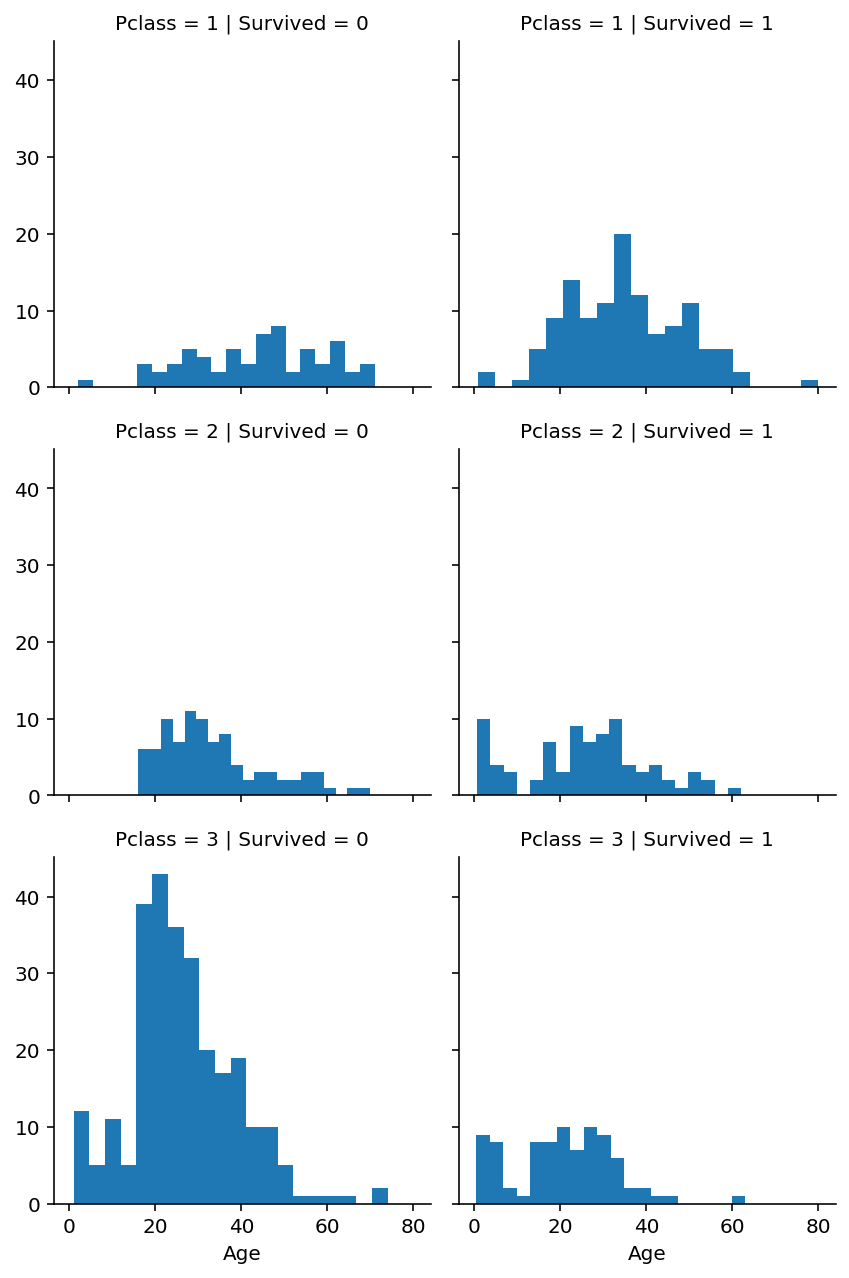

In [18]:
sns.FacetGrid(titanic_df, col='Survived',row = 'Pclass').map(plt.hist, 'Age', bins=20)

## 作业8-4:
综合考虑性别，舱位和登船码头三个因素，计算其生还概率，并在一副图中探索它们和生还概率的关系。

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr

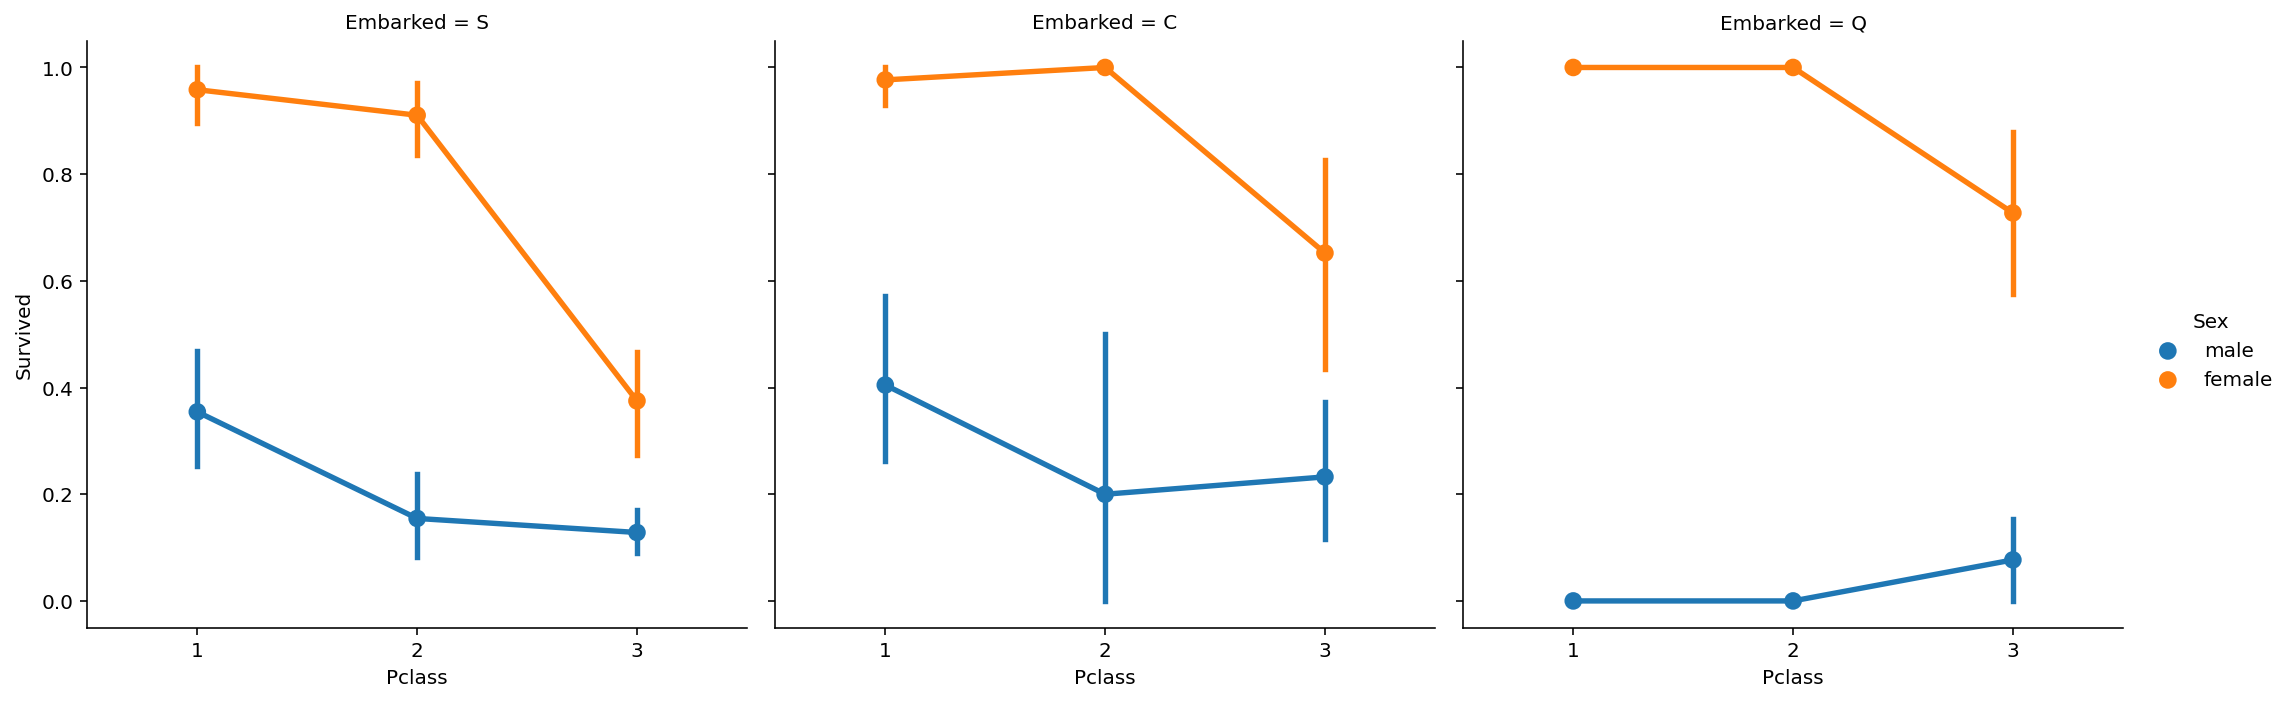

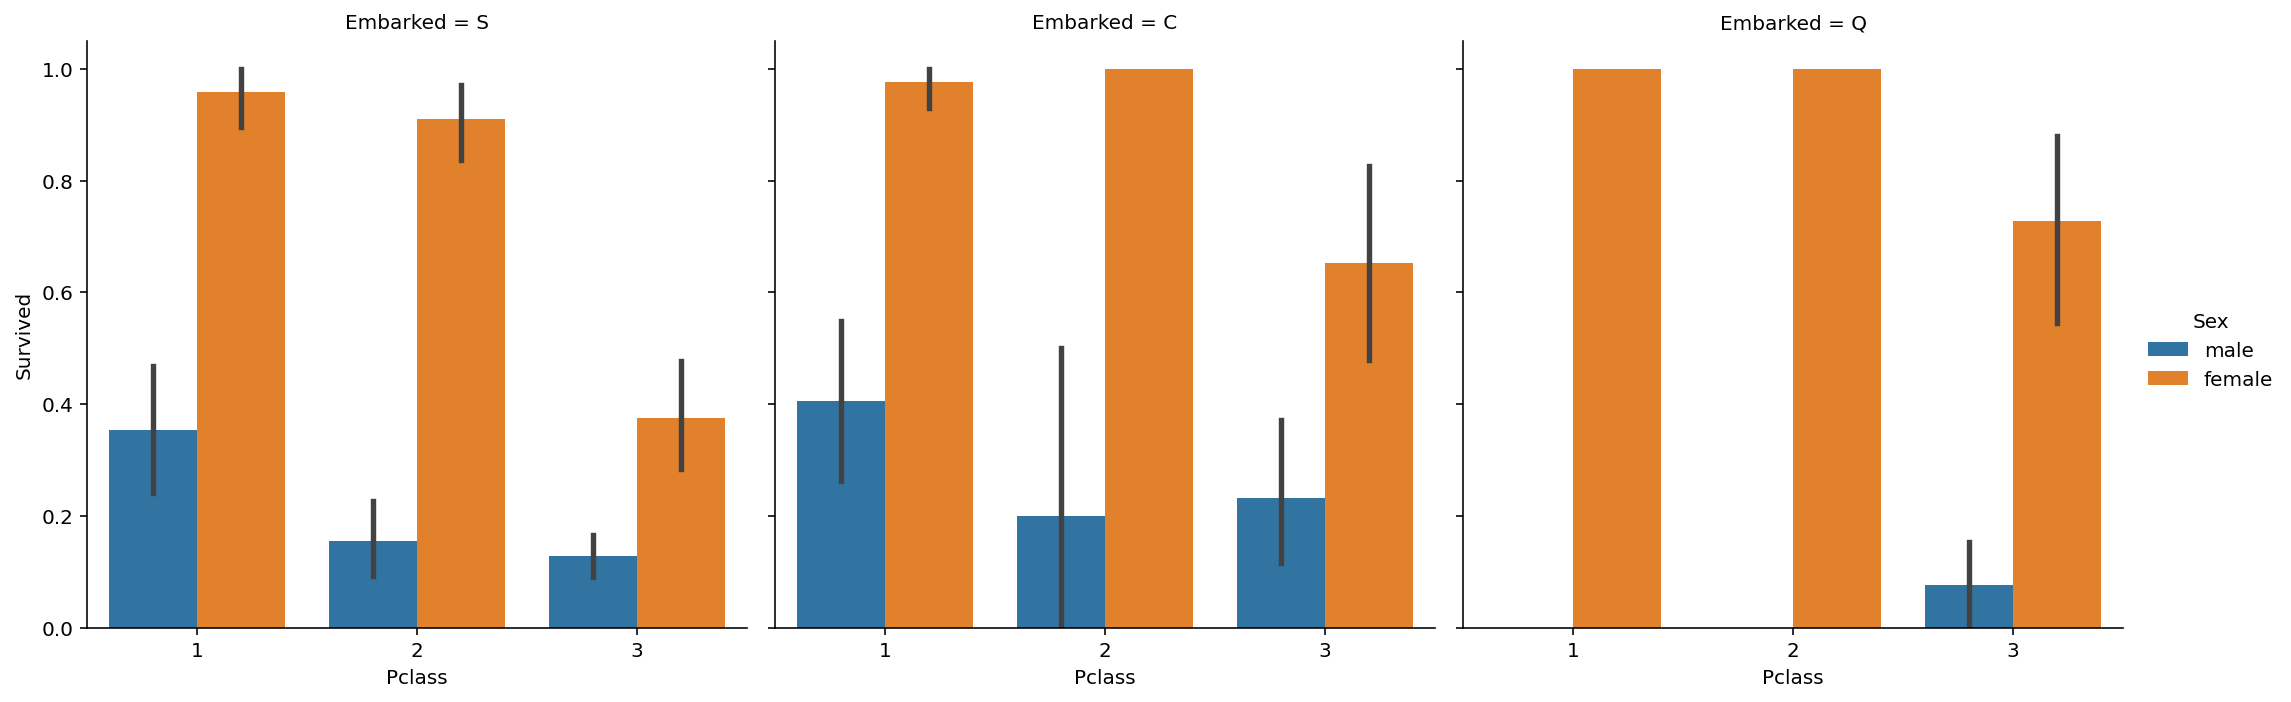

In [25]:
# # 默认点图
sns.factorplot(x="Pclass", y="Survived", hue="Sex", col="Embarked", data=titanic_df)
# # 柱状图
sns.factorplot(x="Pclass", y="Survived", hue="Sex", col="Embarked", data=titanic_df, kind="bar")


# 方法2. 'Embarked', 'Pclass', 'Sex', 'Survived'
# 这种方式最大可以分析三个变量之间的关系，
# 1、这里讨论 关系，舱位 和 性别三者的关系
# sns.barplot(x="Pclass", y="Survived", hue="Sex", data=titanic_df, ci=None)


# 2、使用FacetGrid函数 进行分类讨论
# sns.FacetGrid(data = titanic_df, row='Embarked', aspect=1.5) \
  #  .map(sns.pointplot, 'Sex', 'Survived', 'Pclass',hueorder=['male','female'], palette='deep', ci=None)
